# Check subtypes
- load the distance matrices for FC
- put the subtype maps back into volume space
- visualize them with nilearn

In [2]:
%matplotlib inline

In [4]:
# Imports
import os
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn import plotting as nlp
from matplotlib import pyplot as plt

In [7]:
# Paths
root_p = '/home/surchs/sim_big/PROJECT/abide_hps/'
# Pheno
sample_p = os.path.join(root_p, 'pheno', 'psm_abide1.csv')
# Data
resid_ct_p = os.path.join(root_p, 'residual', 'ct_30mm_residual_psm.npy')
resid_fc_p = os.path.join(root_p, 'residual', 'sd_30mm_residual_psm.npy')
mask_p = os.path.join(root_p, 'mask', 'MIST_mask.nii.gz')
subtype_fc_p = os.path.join(root_p, 'subtypes', 'subtypes_fc.npz')
subtype_ct_p = os.path.join(root_p, 'subtypes', 'subtypes_ct.npz')

In [50]:
# Load data
sample = pd.read_csv(sample_p)
n_sub = sample.shape[0]
mask_i = nib.load(mask_p)
mask = mask_i.get_data().astype(bool)

In [8]:
s_fc = np.load(subtype_fc_p)
s_ct = np.load(subtype_ct_p)

In [46]:
d_fc = s_fc['dist']
o_fc = s_fc['order'].astype(int)
w_fc = s_fc['weights']
p_fc = s_fc['part'].astype(int)
sbt_fc = s_fc['subtypes']

In [13]:
s_fc.keys()

['order', 'part', 'subtypes', 'dist', 'weights']

In [11]:
d_fc.shape

(370, 370, 20)

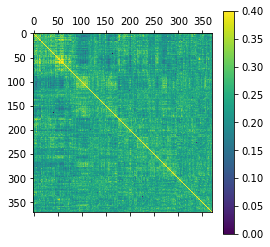

In [45]:
plt.matshow(1-d_fc[..., 0][o_fc[:, 0], :][:, o_fc[:, 0]]/449, vmax=0.4)
plt.colorbar()

In [29]:
d_fc[..., 0].max()

449.17879808700428

In [33]:
w_fc.shape

(370, 5, 20)

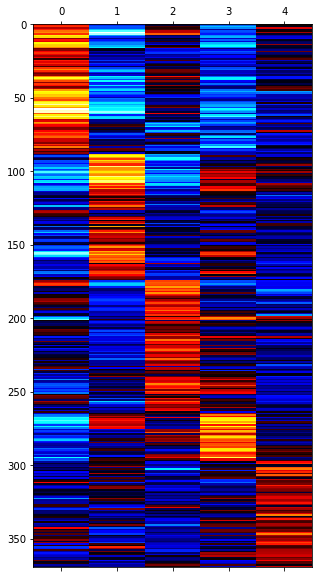

In [39]:
f = plt.figure(figsize=(5,10))
ax = f.add_subplot(111)
ax.matshow(w_fc[..., 2][o_fc[:, 2], :], aspect='auto', cmap=nlp.cm.cold_hot)

In [60]:
# Take a look at one of them
sbt1_1_vec = sbt_fc[0, :, 0]
vol = np.zeros(mask.shape)
vol[mask] = sbt1_1_vec
img = nib.Nifti1Image(vol, affine=mask_i.affine, header=mask_i.header)

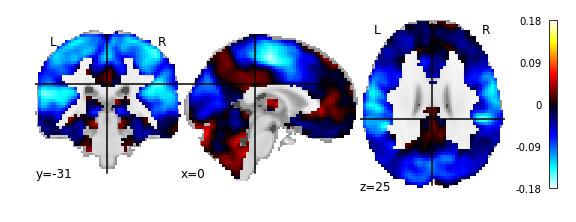

In [61]:
nlp.plot_stat_map(img)

Looks pretty nice too. All good then